🏏 IPL Data Analysis (2008-2019)

# IPL Data Analysis (2008-2019)
This project analyzes IPL matches from 2008 to 2019.  
We explore team performance, toss impact, top batsmen & bowlers, and other interesting insights.

## Step 1 — Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2 — Load Datasets

In [15]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
teams=pd.read_csv("teams.csv")
teamwise=pd.read_csv("teamwise_home_and_away.csv")

Check basic info:

In [51]:
print(matches.head())

   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

In [18]:
matches.shape                        

(756, 18)

In [23]:
matches.columns                      #total columns 

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [27]:
matches['Season'].nunique()            #total seasons

12

In [28]:
matches['Season'].unique()            #list of all seasons

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

## Step 3 — Matches Analysis

Total matches per season

In [31]:
matches['Season'].value_counts()       #matches played per season

Season
IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2014    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: count, dtype: int64

In [35]:
matches['winner'].value_counts()    #total win by each team

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

## Step 4 — Toss & Match Result Analysis

In [37]:
toss_win = matches[matches['toss_winner'] == matches['winner']]          #does winning the toss help winning the match?
toss_win_ratio = len(toss_win) / len(matches)
print("Winning toss and match ratio:", toss_win_ratio)


Winning toss and match ratio: 0.5198412698412699


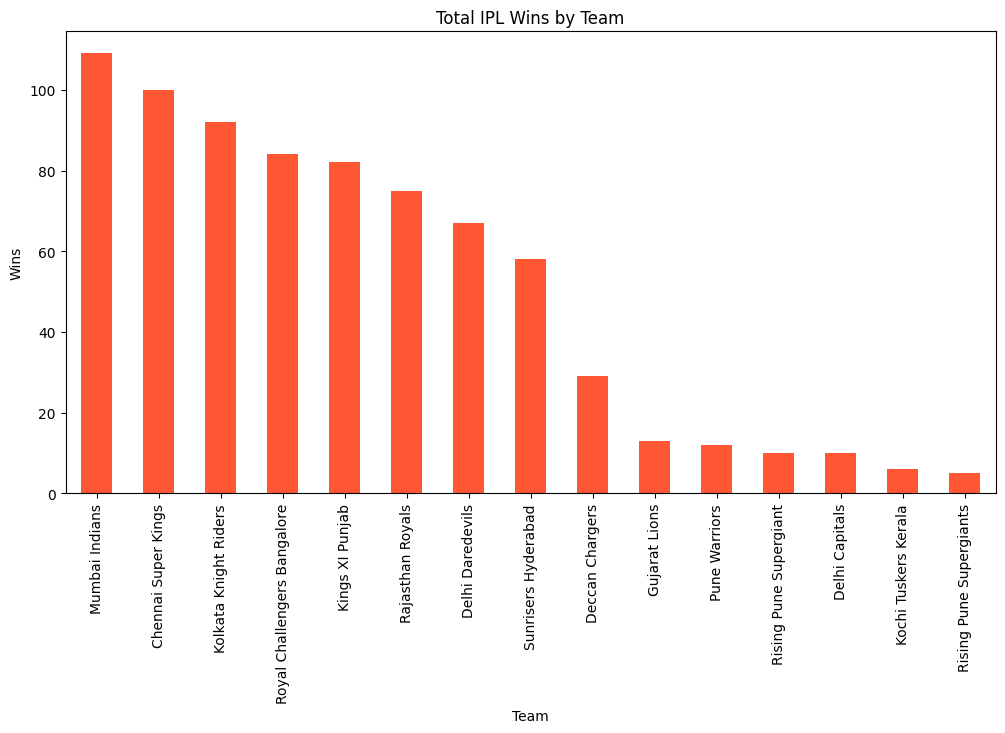

In [39]:
matches['winner'].value_counts().plot(kind='bar', figsize=(12,6), color='#FF5733')       #total wins by team
plt.title("Total IPL Wins by Team")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()

In [40]:
toss_win = matches[matches['toss_winner'] == matches['winner']]
toss_win_ratio = len(toss_win) / len(matches)  # fraction of matches
print("Winning toss and match ratio:", toss_win_ratio)

Winning toss and match ratio: 0.5198412698412699


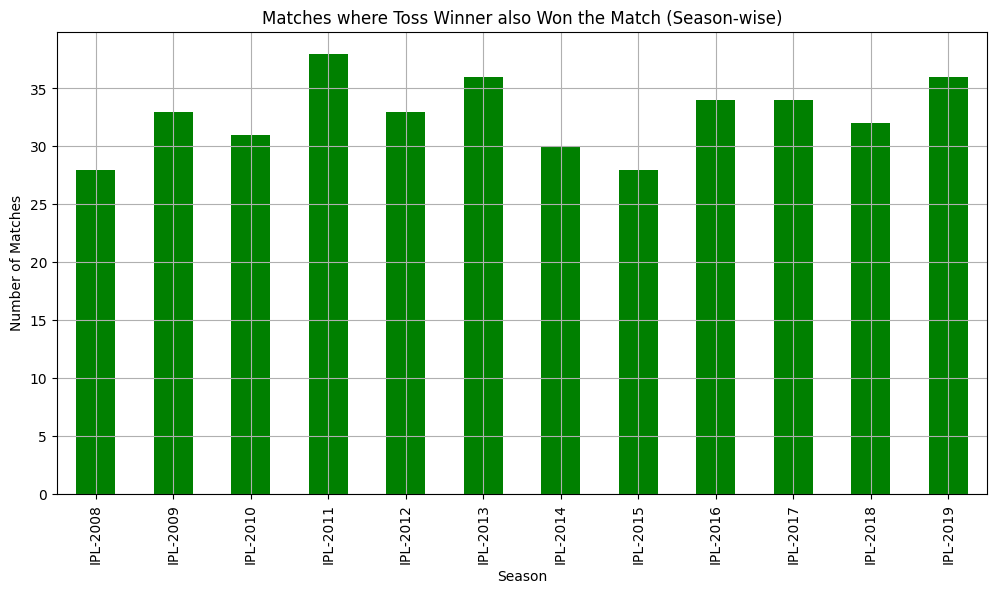

In [49]:
toss_win_season = toss_win.groupby('Season')['toss_winner'].count()
toss_win_season.plot(kind='bar', figsize=(12,6), color='green')
plt.title("Matches where Toss Winner also Won the Match (Season-wise)")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.grid()
plt.show()

In [50]:
matches['result'].value_counts()                

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

In [52]:
deliveries.head()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Step 5 — Deliveries Analysis

Top Batsmen 🏏

In [53]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)      
print(top_batsmen)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64


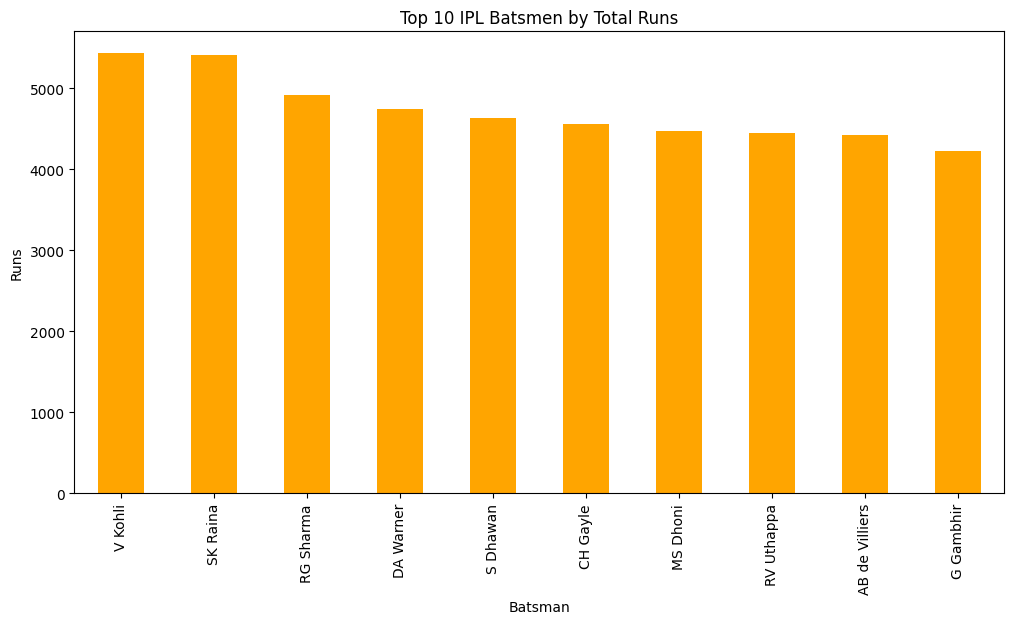

In [56]:
top_batsmen.plot(kind='bar', figsize=(12,6), color='orange')
plt.title("Top 10 IPL Batsmen by Total Runs")
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.show()

Top Bowlers ⚽

In [54]:
wickets = deliveries[deliveries['dismissal_kind'].notnull()]                       
top_bowlers = wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
print(top_bowlers)


bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
Name: dismissal_kind, dtype: int64


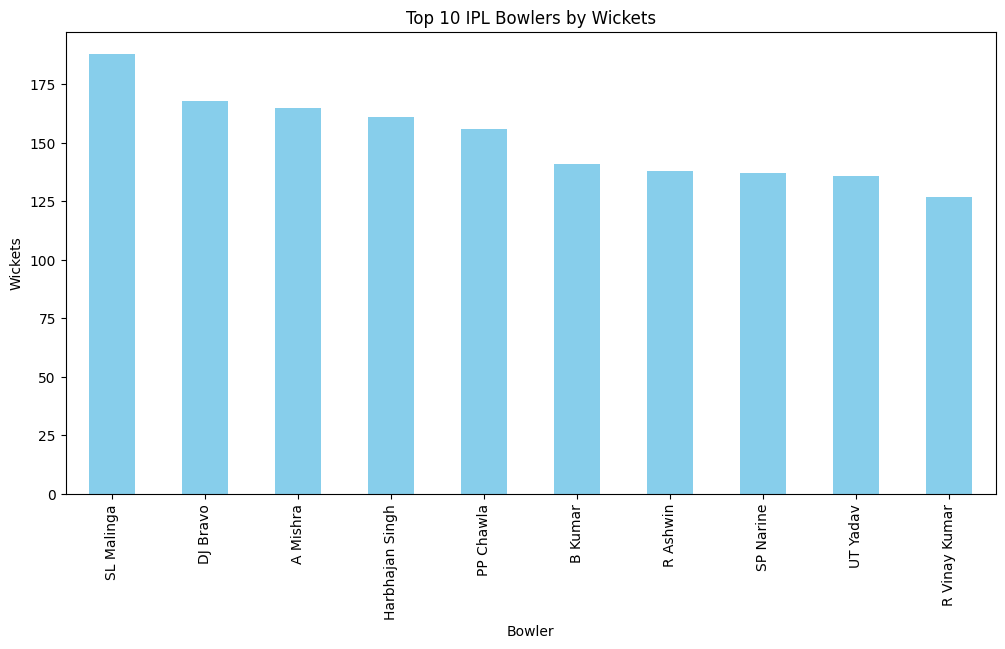

In [59]:
top_bowlers.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Top 10 IPL Bowlers by Wickets")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.show()

Highest Strike Rate 

In [55]:
balls_faced = deliveries.groupby('batsman')['batsman_runs'].count()              
runs_scored = deliveries.groupby('batsman')['batsman_runs'].sum()
strike_rate = (runs_scored / balls_faced) * 100
top_strike_rate = strike_rate.sort_values(ascending=False).head(10)
print(top_strike_rate)


batsman
B Stanlake       250.000000
Umar Gul         205.263158
RS Sodhi         200.000000
S Sharma         200.000000
AD Russell       179.950187
Shahid Afridi    176.086957
I Malhotra       175.000000
S Curran         172.727273
K Gowtham        172.093023
SN Thakur        171.428571
Name: batsman_runs, dtype: float64


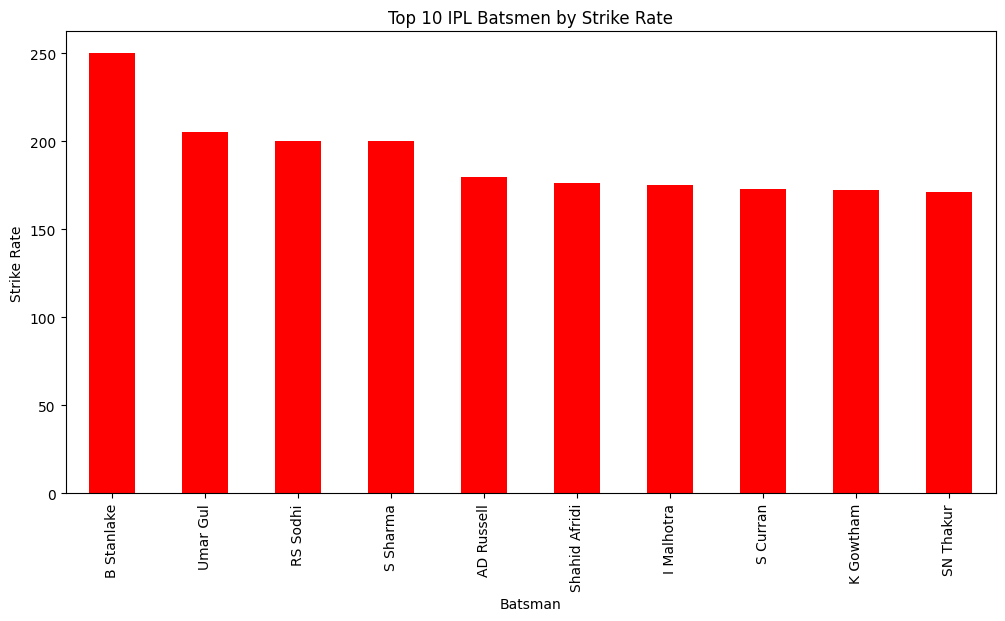

In [60]:
top_strike_rate.plot(kind='bar', figsize=(12,6), color='red')
plt.title("Top 10 IPL Batsmen by Strike Rate")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.show()

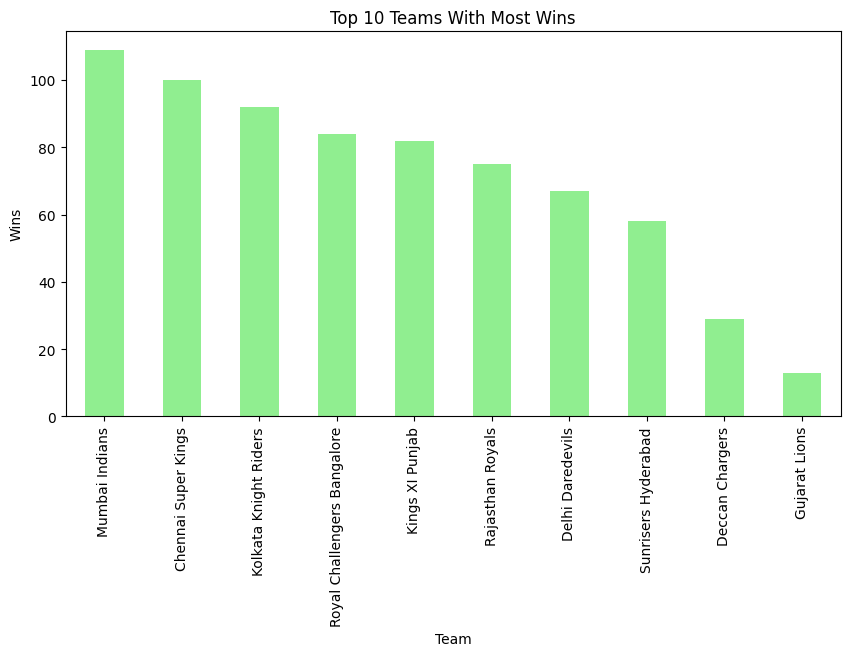

In [10]:
matches['winner'].value_counts().head(10).plot(kind='bar', figsize=(10,5),color='lightgreen')
plt.title("Top 10 Teams With Most Wins")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()

## Step 6 —  Insights & Summary

## 📌 IPL Data Analysis: Key Insights & Summary

### 📊 Team Performance Insights
- **Mumbai Indians** are the most successful team in IPL history with the highest number of wins.  
- Teams like **Chennai Super Kings** and **Kolkata Knight Riders** have consistently performed well across seasons.  
- Toss decisions show that teams often prefer **fielding first**, which can influence match outcomes.  
- Some stadiums like **Wankhede Stadium** and **Eden Gardens** hosted the most matches and saw interesting home/away performance patterns.

### 🌟 Player Performance Insights
- **Top Batsmen:** Virat Kohli, AB de Villiers, Chris Gayle consistently scored the most runs.  
- **Top Bowlers:** Lasith Malinga, Jasprit Bumrah, Sunil Narine took the highest wickets.  
- **Best Strike Rates:** Certain players have maintained high strike rates, contributing to match-winning performances.  
- **Player of the Match Awards:** Legendary players like AB de Villiers, Chris Gayle, and Rohit Sharma won the most awards, showing their impact in crucial games.

### 🏁 Seasonal Trends
- **IPL 2013** had the highest number of matches (76), followed by IPL 2012 and IPL 2011.  
- Team performance and high-scoring matches vary across seasons, indicating changes in team strategies and player form.  

### 💡 Conclusion
This IPL Data Analysis provides a **comprehensive overview of teams, players, and season trends**.  
The insights help understand **top-performing teams and players**, predict **potential match outcomes**, and identify **strategic trends** in IPL history.  
Such analysis is valuable for fans, analysts, and cricket organizations to make informed decisions.